In [28]:
from datasets import load_dataset

df = load_dataset("Pablinho/movies-dataset")["train"].to_pandas()

In [29]:
import pandas as pd

In [30]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


# EDA & Pre Processing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


ada beberapa missing values di dataset ini. Title seharusnya di drop, karena kita tidak bisa menentukan judul film jika memang tidak tertera.

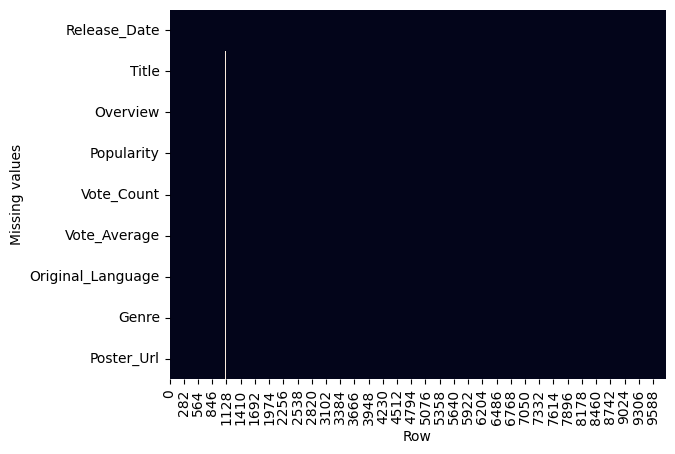

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Row")
plt.ylabel("Missing values")

plt.show()

dari sini bisa dilihat bahwa memang terdapat 1 garis null values di lokasi yang sama, menandakan bahwa data film yang hilang memang missing 1 row penuh

In [33]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,None,None,None,None,None
1106,- Just Desserts,None,None,NaN,None,None,None,None,None
1107,- If The Hue Fits,None,None,NaN,None,None,None,None,None
1108,- Dust Up,None,None,NaN,None,None,None,None,None
1109,- Scents And Sensibility,None,None,NaN,None,None,None,None,None
1110,- Just One Of The Girls,None,None,NaN,None,None,None,None,None
1111,- Volleybug,None,None,NaN,None,None,None,None,None
1112,- Hide And Tink,None,None,NaN,None,None,None,None,None
1113,- Rainbow's Ends,None,None,NaN,None,None,None,None,None
1114,- Fawn And Games,None,None,NaN,None,None,None,None,None


In [34]:
df = df.dropna(subset=["Title"])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9828 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 767.8+ KB


In [36]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,None,None,None,None,None
1115,- Magic Tricks,61.328,35,7.1,en,Animation,https://image.tmdb.org/t/p/original/6iXYe7AkQ1...,None,None


karena keduanya tidak ada description/overview, jadi kita tidak bisa menerapkan semantic recommendation (rekomendasi berbasis cerita/description/makna yang sama), kita lebih baik drop saja dan tidak merekomendasikannya.

In [37]:
df = df.drop([1105, 1115], axis=0)
df = df.reset_index(drop=True)      

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   object 
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.0+ KB


Merubah dtype beberapa kolom dan membuat kolom baru yaitu tahun rilis film

In [39]:
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"], errors="coerce")
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"], errors="coerce")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.0+ KB


In [41]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")
df["Release_Year"] = df["Release_Date"].dt.year

In [42]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021
...,...,...,...,...,...,...,...,...,...,...
9821,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,1973
9822,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,2020
9823,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,2016
9824,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021


In [43]:
df.describe()

,Popularity,Vote_Count,Vote_Average,Release_Year
count,9826.000000,9826.000000,9826.000000,9826.000000
mean,40.324053,1392.943721,6.439467,2006.202931
std,108.880698,2611.303856,1.129797,15.686202
min,13.354000,0.000000,0.000000,1902.000000
25%,16.128250,146.000000,5.900000,2000.000000
50%,21.195000,444.000000,6.500000,2011.000000
75%,35.179250,1376.000000,7.100000,2017.000000
max,5083.954000,31077.000000,10.000000,2024.000000


In [44]:
df['Original_Language'].value_counts()

en    7569
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: Original_Language, dtype: int64

karena banyak film dengan bahasa yang bervariasi dan jumlah dikit, kita jadikan other aja, untuk mengurangi kardinalitas

In [45]:
lang_counts = df["Original_Language"].value_counts()

top_langs = lang_counts.head(10).index
df["Original_Language"] = df["Original_Language"].where(df["Original_Language"].isin(top_langs), "other")
print(df["Original_Language"].value_counts())

en       7569
ja        645
es        339
fr        292
other     285
ko        170
zh        129
it        123
cn        109
ru         83
de         82
Name: Original_Language, dtype: int64


### Karena semantic embedding, salah satu faktor terpenting adalah synopsis, makanya kita harus buang film yang sinopsisnya tidak representatif

In [46]:
df["words_in_overview"] = df["Overview"].str.split().str.len()
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,words_in_overview
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,45
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,28
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022,46
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021,89
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021,28
...,...,...,...,...,...,...,...,...,...,...,...
9821,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,1973,30
9822,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,2020,36
9823,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,2016,58
9824,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021,40


In [47]:
df.loc[df["words_in_overview"].between(1, 5), "Overview"]

6422    Plot unknown.
Name: Overview, dtype: object

In [48]:
df.loc[df["words_in_overview"].between(6, 8), "Overview"]

210               The tenth installment in the Fast Saga.
1919              A bad boy and a socialite girl hook-up.
2262    Tokyo Philharmonic Orchestra live Kimetsu no Y...
2561       Scrat struggles once again to protect his nut.
2590          A group of arcanes enjoy fighting vampires.
3322    The fourth installment of the Despicable Me fr...
3338            The third installment of Creed franchise.
3488    The further adventures of crime-fighting super...
3523     The deconstruction of the Avatar scenes and sets
3892              Leo San Juan returns to face the mummys
4307                  A comedy directed by Günter Hendel.
4336                  The sequel to Black Panther (2018).
5085    The life story of Brazilian football legend, P...
6457          A child's nightmare takes over his reality.
6484                 The sequel to Captain Marvel (2019).
7737              A restaurant owner leads a double life.
7938           Documentary on the making of 'Spider-Man.'
8009        A 

In [49]:
df.loc[df["words_in_overview"].between(9, 11), "Overview"]

112     Jennifer Dulos, the wealthy, Connecticut mothe...
509     Ex-con Zequi and company come back for a new a...
589     Yugi and Kaiba have a special duel that transc...
1988    The third of three Kuroko no Basket compilatio...
2287    The fourth installment of the Marvel Studios' ...
2309    Amber Heard and Nicole Kidman discuss their ch...
2420    Post-finale feature-length documentary about t...
2555    A company retreat on a tropical island goes te...
2610    First of three compilation films of Kuroko no ...
2613    Second part of the biopic of the religious lea...
2887    An attractive radio hot line worker becomes ro...
3046    The men who made millions from a global econom...
3148    Beings with supernatural powers join together ...
3269    This film tracks a hasty marriage through its ...
4545    An orphaned child's dreams—and nightmares—mani...
4618    Four high school students look to redefine the...
4827    A documentary about black women denouncing rac...
5162    A woma

karena words yang diatas 9 sudah bisa dibilang lumayan oke sebagai synopsis, kita pake itu, dibawah 9 kata, kita drop

In [50]:
df = df[df["words_in_overview"] >= 9]

In [51]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,words_in_overview
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,45
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,28
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022,46
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021,89
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021,28
...,...,...,...,...,...,...,...,...,...,...,...
9821,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,1973,30
9822,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,2020,36
9823,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,2016,58
9824,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021,40


# Join seluruh fitur yang berdampak dan memiliki faktor besar untuk rekomendasi (judul + overview + genre)

In [52]:
import re

# 1) helper: bersihin spasi & NaN
def norm_text(x: pd.Series | str) -> str:
    if pd.isna(x):
        return ""
    s = str(x).strip()
    s = re.sub(r"\s+", " ", s)  # kompres spasi beruntun
    return s

# 2) normalisasi genre (multi-label)
def normalize_genre(g: str) -> str:
    if pd.isna(g) or str(g).strip() == "":
        return ""
    s = str(g).lower()
    # samakan delimiter ke koma
    s = s.replace(';', ',').replace('|', ',').replace('/', ',')
    # split + trim
    parts = [p.strip() for p in s.split(',') if p.strip()]
    # dedup dengan menjaga urutan
    parts = list(dict.fromkeys(parts))
    return ", ".join(parts)

# === APPLY ===
df["Title"] = df["Title"].apply(norm_text)
df["Overview"] = df["Overview"].apply(norm_text)
df["Genre"] = df["Genre"].apply(normalize_genre)

def build_text(row):
    parts = []
    if row["Title"]:
        parts.append(f"Title: {row['Title']}")
    if row["Genre"]:
        parts.append(f"Genres: {row['Genre']}")
    if row["Overview"]:
        parts.append(f"Overview: {row['Overview']}")
    return " | ".join(parts)

df["text_for_embedding"] = df.apply(build_text, axis=1)

df

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8148\1320426526.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].apply(norm_text)
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8148\1320426526.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Overview"] = df["Overview"].apply(norm_text)
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8148\1320426526.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,words_in_overview,text_for_embedding
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"action, adventure, science fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,45,Title: Spider-Man: No Way Home | Genres: actio...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"crime, mystery, thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,28,"Title: The Batman | Genres: crime, mystery, th..."
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022,46,Title: No Exit | Genres: thriller | Overview: ...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"animation, comedy, family, fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021,89,"Title: Encanto | Genres: animation, comedy, fa..."
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"action, adventure, thriller, war",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021,28,"Title: The King's Man | Genres: action, advent..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9821,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"drama, crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,1973,30,"Title: Badlands | Genres: drama, crime | Overv..."
9822,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,2020,36,Title: Violent Delights | Genres: horror | Ove...
9823,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"mystery, thriller, horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,2016,58,"Title: The Offering | Genres: mystery, thrille..."
9824,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"music, drama, history",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021,40,Title: The United States vs. Billie Holiday | ...


model embedding modern bisa membedakan tanda baca |, sehingga model akan menganggap title, genre, dan overview, sebagai hal yang berbeda.

In [53]:
(
    df
    .drop(["Release_Date", "words_in_overview"], axis=1)
    .to_csv("movies_cleaned.csv", index = False)
)